# Lotka-Volterra 2D

In [1]:
%matplotlib inline
from ecell4.prelude import *

## The Original Model in Ordinary Differential Equations

In [2]:
alpha = 1

with reaction_rules():
    ~u > u | u * (1 - v)
    ~v > v | alpha * v * (u - 1)

m = get_model()

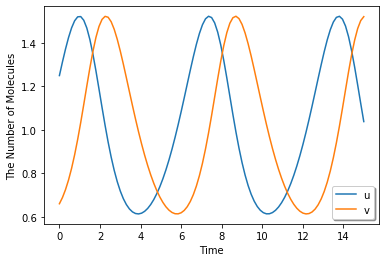

In [3]:
run_simulation(15, {'u': 1.25, 'v': 0.66}, model=m).plot(legend=True)

## The Modified Model Decomposed into Elementary Reactions

In [4]:
alpha = 1

with species_attributes():
    u | {'D': 0.1}
    v | {'D': 0.1}

with reaction_rules():
    u > u + u | 1.0
    u + v > v | 1.0

    u + v > u + v2 | alpha
    v2 > v + v | alpha * 10000.0
    v > ~v | alpha

m = get_model()

In [5]:
session = Session(model=m, y0={'u': 1.25 * 1600, 'v': 0.66 * 1600}, volume=1600)

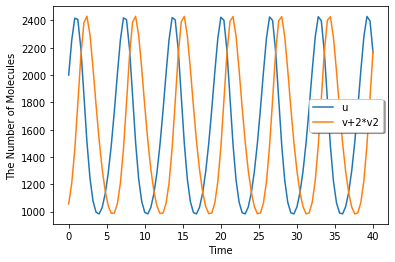

In [6]:
session.run(40).plot(y=['u', 'v+2*v2'], legend=True)

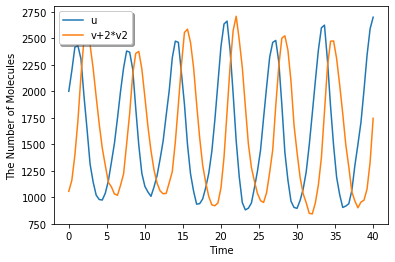

In [7]:
session.run(40, ndiv=100, solver='gillespie').plot(y=['u', 'v+2*v2'], legend=True)

In [8]:
alpha = 1

with species_attributes():
    u | v | {'D': 0.1}

with reaction_rules():
    u > u + u | 1.0
    u + v > v | 1.0
    u + v > u + v + v | alpha
    v > ~v | alpha

m = get_model()

In [9]:
session = Session(model=m, y0={'u': 1.25 * 1600, 'v': 0.66 * 1600}, volume=1600)

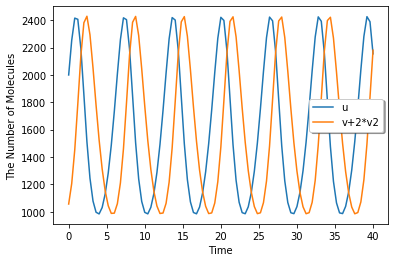

In [10]:
session.run(40).plot(y=['u', 'v+2*v2'], legend=True)

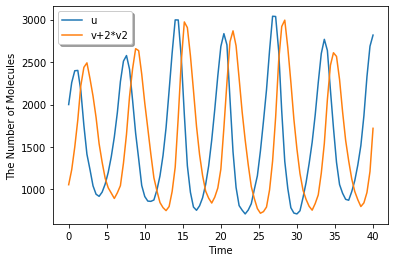

In [11]:
session.run(40, ndiv=100, solver='gillespie').plot(y=['u', 'v+2*v2'], legend=True)

## A Lotka-Volterra-like Model in 2D

In [12]:
V = 1600.0
session = Session(model=m, y0={'u': 1.25 * V, 'v': 0.66 * V}, volume=Real3(40, 40, 1))

In [13]:
ret = session.run(
    100, ndiv=1000, solver=('meso', Integer3(160, 160, 1)), rndseed=0,
    observers=FixedIntervalHDF5Observer(2, "test%03d.h5"))

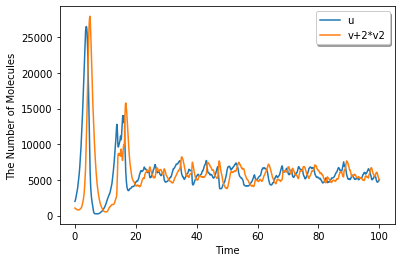

In [14]:
ret.plot(y=['u', 'v+2*v2'], legend=True)

In [15]:
assert V == ret.world.volume()

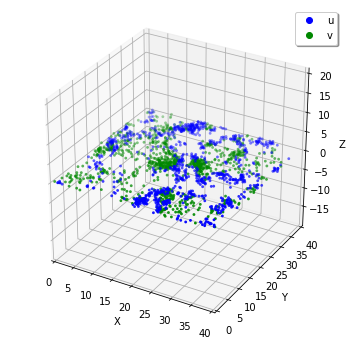

In [16]:
show(ret.world)

In [17]:
plotting.plot_movie_with_attractive_mpl(
    ret.observers[1], linewidth=0, noaxis=True, figsize=6, whratio=1.4,
    angle=(-90, 90, 6), bitrate='10M')